In [76]:
'''
Student Names + (IDs): 

Abdelrahman Mohamed Kamal Abdelaziz (1220255)
Mazen Ahmed Fouad Abdelwahab (1220269)
Mohamed Hesham Ibrahim Hassanain (1220278)
Ahmed Walaa Abdlelkhalek Abdelrahman (1220216)

'''
# Import(s)
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray
from skimage.morphology import dilation, erosion
from skimage.measure import find_contours

In [77]:
def show_images(images,titles=None):
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

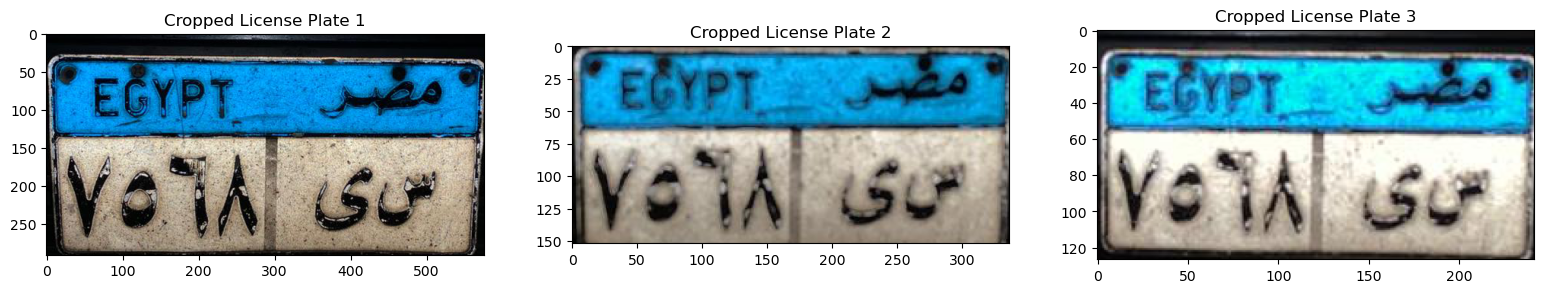

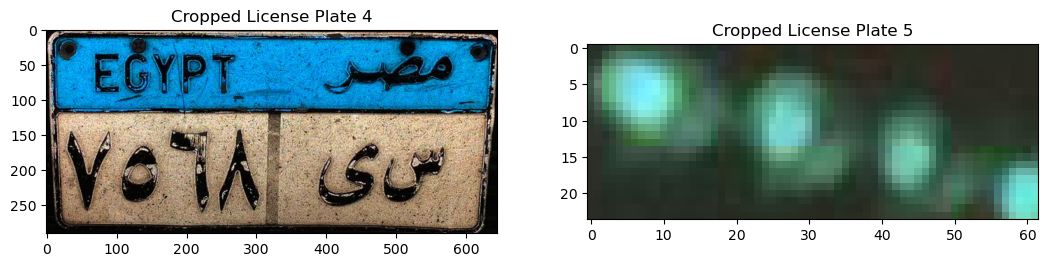

In [78]:
# One Step All Angles No Headlights

Straight1 = io.imread('Localization Test/One Step All Angles No Headlights/Straight.jpeg')
Straight2 = io.imread('Localization Test/Two Step All Angles No Headlights/Straight.jpeg')
Straight3 = io.imread('Localization Test/Three Step All Angles No Headlights/Straight.jpeg')
Straight4 = io.imread('Localization Test/One Step All Angles With Headlights/Straight.jpeg')
Straight5 = io.imread('Localization Test/Two Step All Angles With Headlights/Straight.jpeg')

def preprocess_image(image):
    Gray = rgb2gray(image)
    Binary = Gray > 0.5
    closing = erosion(dilation(Binary,np.ones((30,30))),np.ones((30,30)))
    boxes = find_contours(closing,0.8)
    return boxes

def get_License_Plate(boxes, image):
    for box in boxes:
        y_min, y_max = int(np.min(box[:, 0])), int(np.max(box[:, 0]))
        x_min, x_max = int(np.min(box[:, 1])), int(np.max(box[:, 1]))

        width = x_max - x_min
        height = y_max - y_min

        if height == 0:
            continue

        aspect = width / height
        area = width * height

        if 1.5 < aspect < 2.7 and area > 1000:
            plate = image[y_min:y_max, x_min:x_max]
    
    return plate

boxes1 = preprocess_image(Straight1)
plate_crop1 = get_License_Plate(boxes1, Straight1)

boxes2 = preprocess_image(Straight2)
plate_crop2 = get_License_Plate(boxes2, Straight2)

boxes3 = preprocess_image(Straight3)
plate_crop3 = get_License_Plate(boxes3, Straight3)

boxes4 = preprocess_image(Straight4)
plate_crop4 = get_License_Plate(boxes4, Straight4)

boxes5 = preprocess_image(Straight5)
plate_crop5 = get_License_Plate(boxes5, Straight5)

show_images([plate_crop1, plate_crop2, plate_crop3], ["Cropped License Plate 1", "Cropped License Plate 2", "Cropped License Plate 3"])
show_images([plate_crop4, plate_crop5], ["Cropped License Plate 4", "Cropped License Plate 5"])